In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA 

In [29]:

df = pd.read_csv("Dataset_Perceraian_Jabar.csv")
df.columns = df.columns.str.strip()
print(df.to_string())

    No nama daerah jawa barat  Ekonomi  Perselisihan  Meninggalkan Salah Satu  KDRT
0    1                BANDUNG     2996          6357                      761    90
1    2                 BEKASI      986          2521                      399    37
2    3                  BOGOR      381           900                      199    15
3    4                 CIAMIS     7096          1149                      236    19
4    5                CIANJUR     1689          2759                      411     5
5    6               CIBADAK       316          3198                      192    13
6    7               CIBINONG     2849          4529                      889    53
7    8               CIKARANG      255          3783                      647   154
8    9                 CIMAHI     3527          4593                     1600    79
9   10                CIREBON      255           596                      237    64
10  11                  DEPOK     1317          3453                      81

In [17]:
# 2. Menghitung metrik 
df['total_kasus'] = df['Ekonomi'] + df['Perselisihan'] + df['Meninggalkan Salah Satu'] + df['KDRT']
df['ekonomi_rate'] = (df['Ekonomi'] / df['total_kasus']) * 100
df['perselisihan_rate'] = (df['Perselisihan'] / df['total_kasus']) * 100

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows with additional metrics:")
print(df[['nama daerah jawa barat', 'total_kasus', 'ekonomi_rate', 'perselisihan_rate']].head())

Dataset Shape: (26, 9)

First 5 rows with additional metrics:
  nama daerah jawa barat  total_kasus  ekonomi_rate  perselisihan_rate
0                BANDUNG        10204     29.361035          62.299098
1                 BEKASI         3943     25.006340          63.936089
2                  BOGOR         1495     25.484950          60.200669
3                 CIAMIS         8500     83.482353          13.517647
4                CIANJUR         4864     34.724507          56.722862


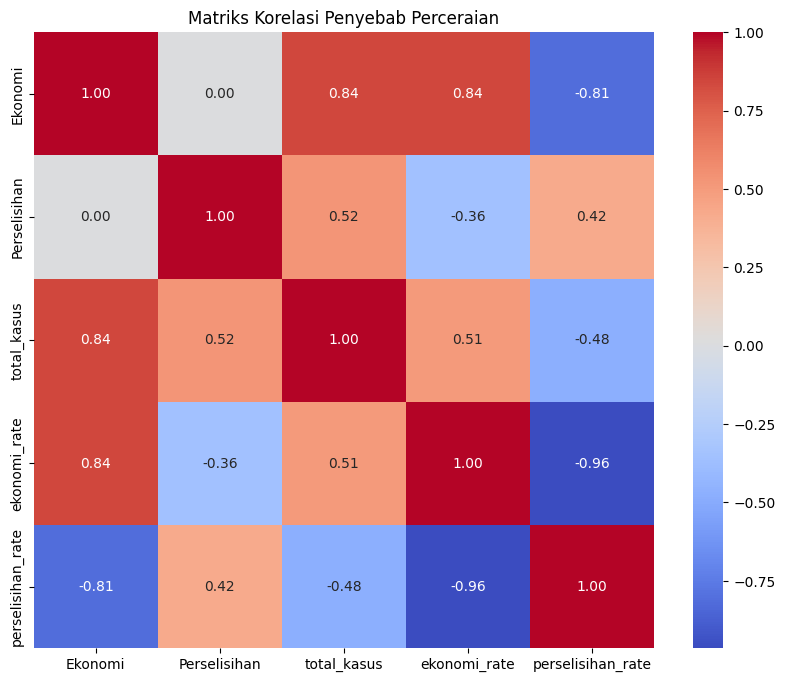

In [28]:
corr_matrix = df[['Ekonomi', 'Perselisihan', 'total_kasus', 'ekonomi_rate', 'perselisihan_rate']].corr()

# 3. Visualisasi Heatmap sesuai template Anda
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

plt.title('Matriks Korelasi Penyebab Perceraian')
plt.show()

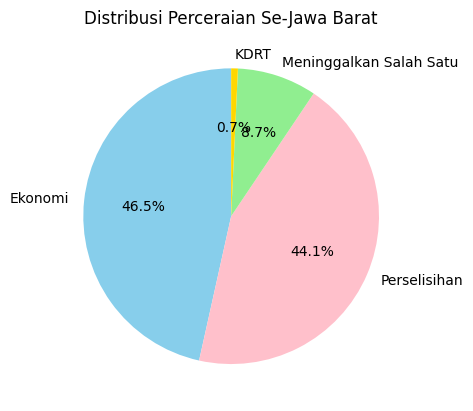

In [18]:
Kategori_counts = df[['Ekonomi', 'Perselisihan', 'Meninggalkan Salah Satu', 'KDRT']].sum()

plt.pie(Kategori_counts, 
        labels=Kategori_counts.index, 
        autopct='%1.1f%%', 
        colors=['skyblue', 'pink', 'lightgreen', 'gold'], 
        startangle=90)

plt.title("Distribusi Perceraian Se-Jawa Barat")
plt.show()

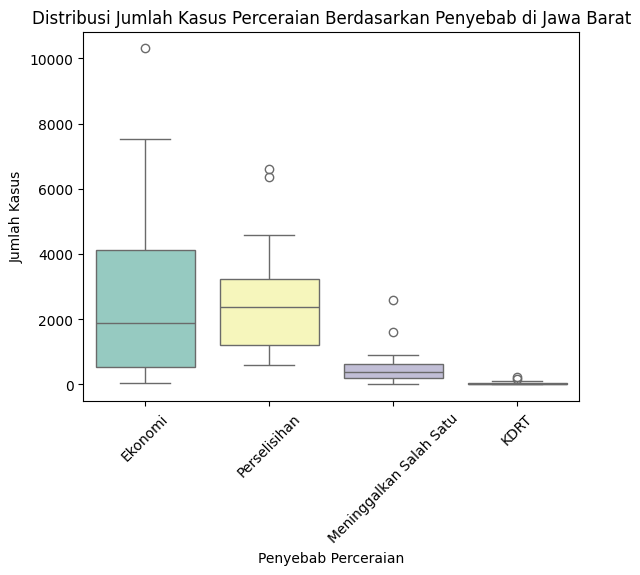

In [19]:
#dikarenakan boxplot hanya menggunakan satu data df.melt kegunaanya data yang banyak akan disatukan.
df_melted = df.melt(id_vars=['nama daerah jawa barat'], 
                    value_vars=['Ekonomi', 'Perselisihan', 'Meninggalkan Salah Satu', 'KDRT'],
                    var_name='Penyebab', 
                    value_name='Jumlah_Kasus')

sns.boxplot(
    data=df_melted,
    x='Penyebab',
    y='Jumlah_Kasus',
    hue='Penyebab',
    palette='Set3',
    legend=False
)

plt.title("Distribusi Jumlah Kasus Perceraian Berdasarkan Penyebab di Jawa Barat")
plt.xlabel("Penyebab Perceraian")
plt.ylabel("Jumlah Kasus")
plt.xticks(rotation=45)
plt.show()

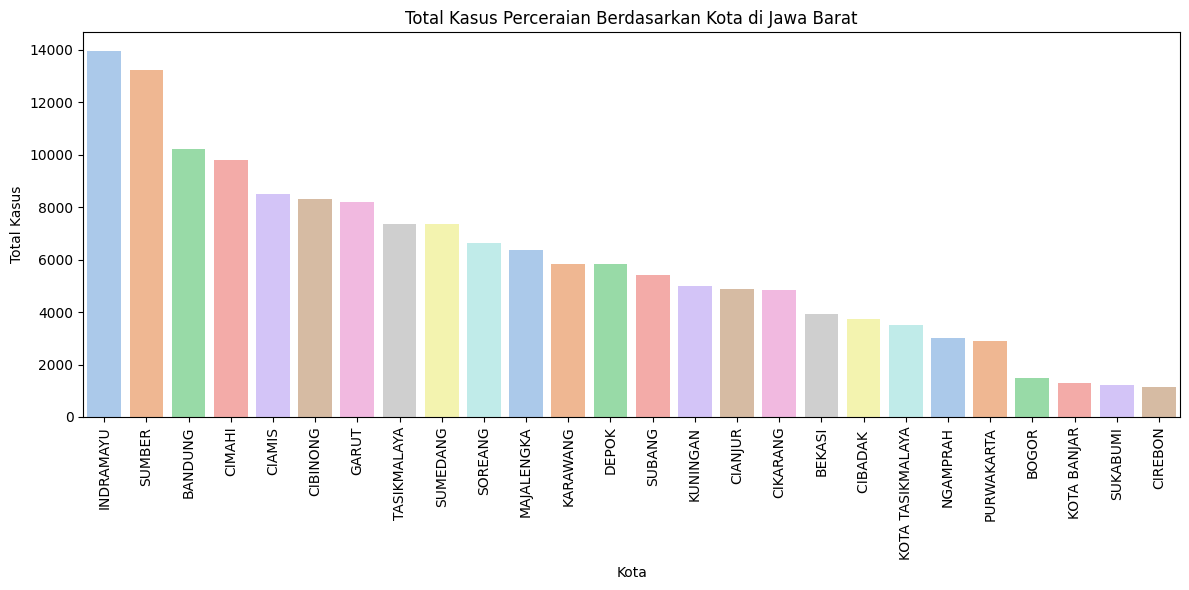

In [20]:
#Menghitung Total Kasus per daerah
df['Total_Kasus'] = df[['Ekonomi', 'Perselisihan', 'Meninggalkan Salah Satu', 'KDRT']].sum(axis=1)
#Mengurutkan data berdasarkan jumlah kasus yang ada 
df_sorted = df.sort_values(by='Total_Kasus', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_sorted,
    x='nama daerah jawa barat',
    y='Total_Kasus',             
    estimator=sum,
    hue='nama daerah jawa barat',          
    palette='pastel'
)


plt.title("Total Kasus Perceraian Berdasarkan Kota di Jawa Barat")
plt.xlabel("Kota")
plt.ylabel("Total Kasus")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

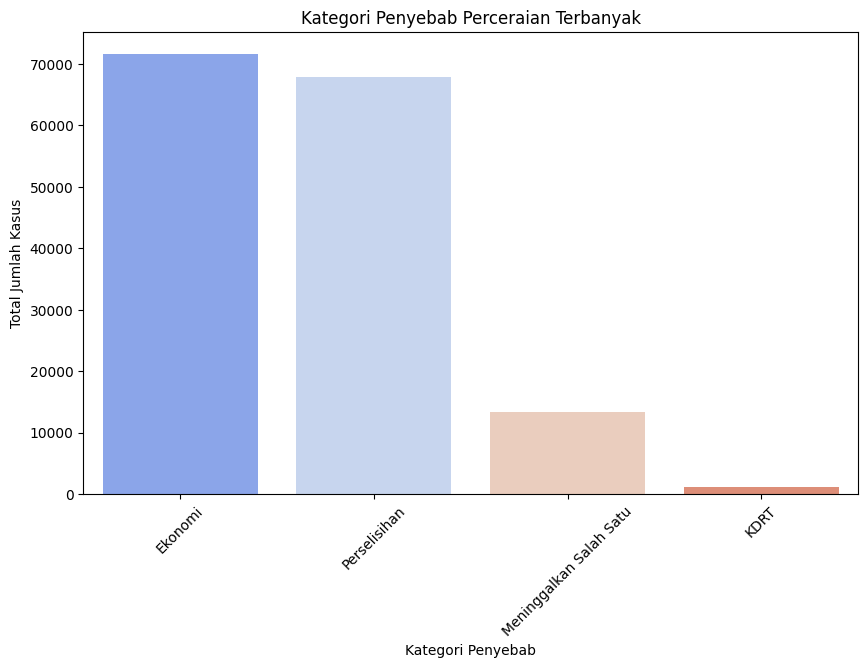

In [21]:
#sum().sort_values(ascending=False) ini menggantikan order=df['...'].value_counts().index . dikarenakan data ini berupa angka 
kategori_counts = df[['Ekonomi', 'Perselisihan', 'Meninggalkan Salah Satu', 'KDRT']].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=kategori_counts.index,
    y=kategori_counts.values,
    hue=kategori_counts.index,
    palette='coolwarm',
    legend=False
)

plt.title("Kategori Penyebab Perceraian Terbanyak")
plt.xlabel("Kategori Penyebab")
plt.ylabel("Total Jumlah Kasus")
plt.xticks(rotation=45)
plt.show()

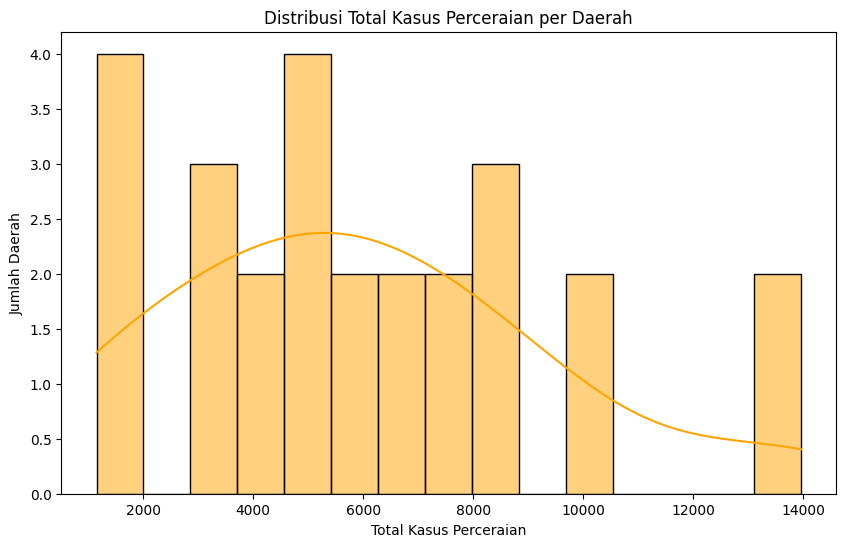

In [22]:
#Menghitung Total Kasus per daerah
df['Total_Kasus'] = df[['Ekonomi', 'Perselisihan', 'Meninggalkan Salah Satu', 'KDRT']].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Kasus'],
             kde=True,
             color='orange',
             bins=15)

plt.title("Distribusi Total Kasus Perceraian per Daerah")
plt.xlabel("Total Kasus Perceraian")
plt.ylabel("Jumlah Daerah")
plt.show()

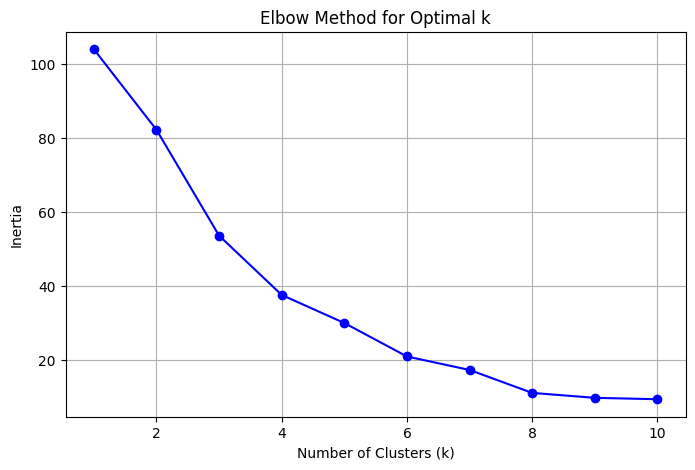

In [23]:
# Memilih fitur untuk clustering
features = [
    "Ekonomi",
    "Perselisihan",
    "Meninggalkan Salah Satu",
    "KDRT"
]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

inertia = []
K_values = range(1, 11)

# Hitung inertia setiap k
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia, marker='o', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

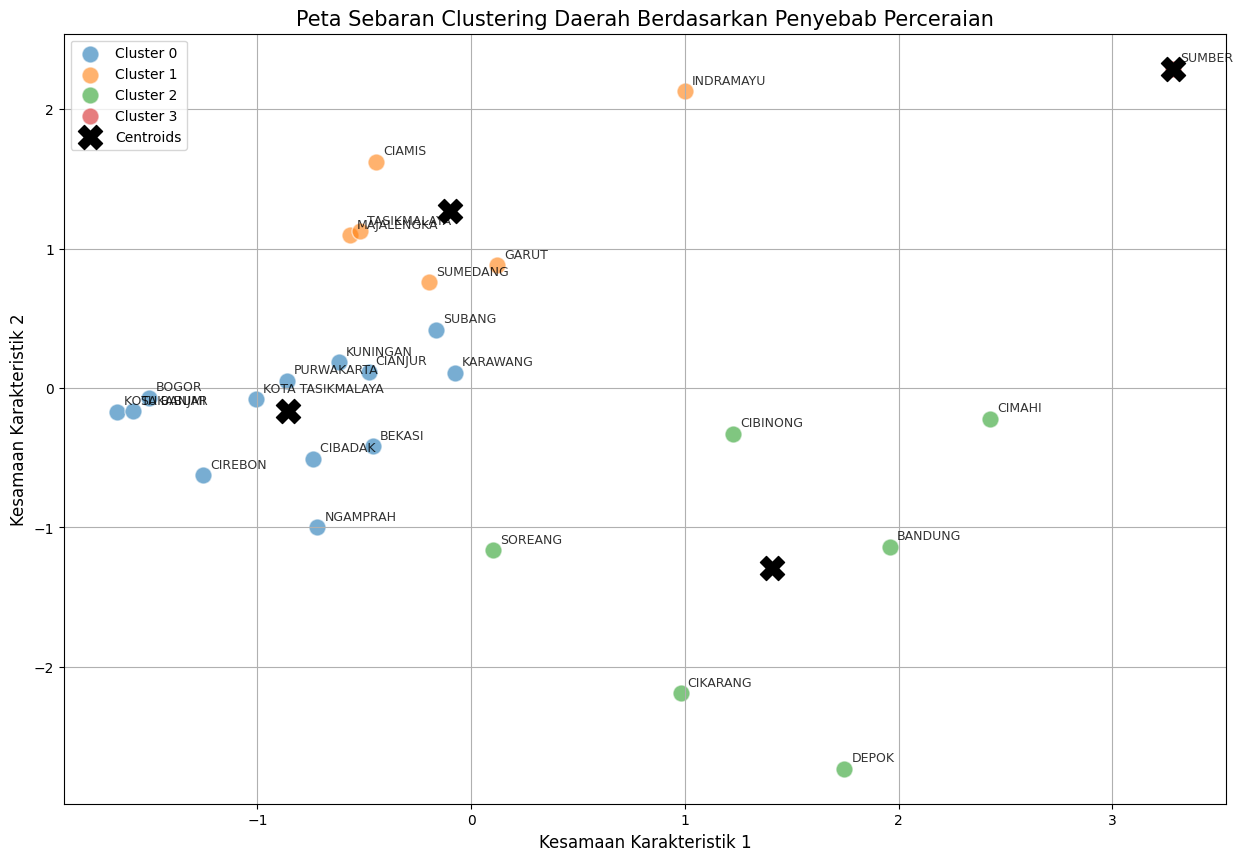

In [27]:

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)

# =Mengurangi dimensi data visualisasi
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# 4. Plot hasil clustering
plt.figure(figsize=(15, 10))
colors = cm.tab10(range(optimal_k))

for cluster in range(optimal_k):
    cluster_points = reduced_features[df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], 
                cluster_points[:, 1],
                s=150, 
                label=f'Cluster {cluster}',
                color=colors[cluster],
                edgecolors='white', 
                alpha=0.6)

# LABEL TITIK (NAMA DAERAH)
for i, txt in enumerate(df['nama daerah jawa barat']):
    plt.annotate(txt, 
                 (reduced_features[i, 0], reduced_features[i, 1]), 
                 xytext=(5, 5), 
                 textcoords='offset points', 
                 fontsize=9, 
                 alpha=0.8)

# 5. Menambahkan Centroids pada plot
centroids_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0],
            centroids_reduced[:, 1],
            s=300,
            c='black',
            marker='X',
            label='Centroids')

plt.title("Peta Sebaran Clustering Daerah Berdasarkan Penyebab Perceraian", fontsize=15)
plt.xlabel("Kesamaan Karakteristik 1", fontsize=12) 
plt.ylabel("Kesamaan Karakteristik 2", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [26]:
# Analisis Cluster
print("\n" + "="*70)
print("ANALISIS KELOMPOK DAERAH ")
print("="*70)

# Pemetaan kategori berdasarkan karakteristik data perceraian
cluster_categories = {
    0: "KASUS MODERAT",
    1: "DOMINAN EKONOMI",
    2: "KONFLIK TINGGI & KDRT",
    3: "EKONOMI EKSTREM"
}

emoji_map = {
    "EKONOMI EKSTREM": "🔴",
    "DOMINAN EKONOMI": "🟠",
    "KONFLIK TINGGI & KDRT": "🟡",
    "KASUS MODERAT": "🟢"
}

# Looping untuk menampilkan detail tiap cluster
for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    category = cluster_categories[cluster_id]
    
    print(f"\n{emoji_map[category]} Cluster {cluster_id} - {category} ({len(cluster_data)} daerah):")
    print(f"   Rata-rata Ekonomi      : {cluster_data['Ekonomi'].mean():.0f} kasus")
    print(f"   Rata-rata Perselisihan : {cluster_data['Perselisihan'].mean():.0f} kasus")
    print(f"   Rata-rata KDRT         : {cluster_data['KDRT'].mean():.0f} kasus")
    print(f"   Daftar Daerah          : {', '.join(sorted(cluster_data['nama daerah jawa barat'].tolist()))}")

print(f"\n{'='*70}")
print(f"RINGKASAN DISTRIBUSI:")
print(f"{'='*70}")
df['category'] = df['cluster'].map(cluster_categories)
print(df['category'].value_counts())
print(f"{'='*70}")


ANALISIS KELOMPOK DAERAH 

🟢 Cluster 0 - KASUS MODERAT (13 daerah):
   Rata-rata Ekonomi      : 1192 kasus
   Rata-rata Perselisihan : 1815 kasus
   Rata-rata KDRT         : 29 kasus
   Daftar Daerah          : BEKASI, BOGOR, CIANJUR, CIBADAK , CIREBON, KARAWANG, KOTA BANJAR, KOTA TASIKMALAYA, KUNINGAN, NGAMPRAH, PURWAKARTA, SUBANG, SUKABUMI

🟠 Cluster 1 - DOMINAN EKONOMI (6 daerah):
   Rata-rata Ekonomi      : 6269 kasus
   Rata-rata Perselisihan : 1971 kasus
   Rata-rata KDRT         : 21 kasus
   Daftar Daerah          : CIAMIS, GARUT, INDRAMAYU, MAJALENGKA, SUMEDANG, TASIKMALAYA

🟡 Cluster 2 - KONFLIK TINGGI & KDRT (6 daerah):
   Rata-rata Ekonomi      : 1829 kasus
   Rata-rata Perselisihan : 4885 kasus
   Rata-rata KDRT         : 102 kasus
   Daftar Daerah          : BANDUNG, CIBINONG, CIKARANG, CIMAHI, DEPOK, SOREANG

🔴 Cluster 3 - EKONOMI EKSTREM (1 daerah):
   Rata-rata Ekonomi      : 7538 kasus
   Rata-rata Perselisihan : 3100 kasus
   Rata-rata KDRT         : 13 kasus
   Daf